In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] a= 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [7]:
df = pd.read_csv('data/merged_data_brand_dropna.csv')

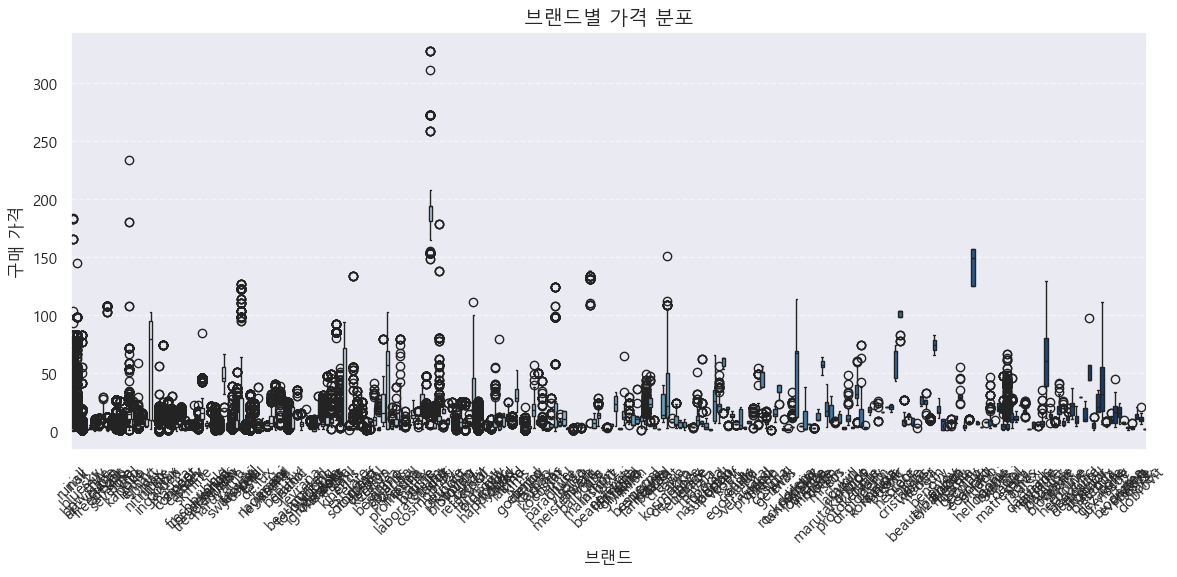

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 구매 이벤트만 사용 (필요시 전체 데이터도 가능)
purchase_df = df[df['event_type'] == 'purchase'].copy()

# 2. 브랜드별 가격 분포 박스플롯
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=purchase_df,
    x='brand',
    y='price',
    palette='Blues'
)
plt.xticks(rotation=45)
plt.title('브랜드별 가격 분포', fontsize=14)
plt.xlabel('브랜드', fontsize=12)
plt.ylabel('구매 가격', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [10]:
# 1. 주문(purchase)만 필터링
purchase_df = df[df['event_type'] == 'purchase']

# 2. 브랜드별 주문 수 집계 (내림차순)
brand_purchase_counts = purchase_df['brand'].value_counts()

# 3. 상위 20개 브랜드 선정 (주문 수 기준)
top20_brands = brand_purchase_counts.head(20).index

# 4. 상위 20개 브랜드 주문 비율 계산 (비율도 순서 동일하게)
brand_purchase_ratio = (brand_purchase_counts / brand_purchase_counts.sum() * 100).loc[top20_brands]

# 5. 상위 20개 브랜드 주문 데이터만 필터링
purchase_top20 = purchase_df[purchase_df['brand'].isin(top20_brands)]

# 6. 브랜드별 평균 가격 계산
brand_mean_price = purchase_top20.groupby('brand')['price'].mean().loc[top20_brands]

print(f"주문(purchase) 비율 기준 상위 20개 브랜드:\n")

# 7. 결과 출력 (주문 비율과 평균 가격 같이 보기)
result_df = pd.DataFrame({
    '주문비율(%)': brand_purchase_ratio.round(2),
    '평균주문가격': brand_mean_price.round(2)
})

print(result_df)

주문(purchase) 비율 기준 상위 20개 브랜드:

           주문비율(%)  평균주문가격
brand                     
runail       15.11    3.08
irisk        10.01    3.03
masura        6.74    2.81
grattol       6.72    5.38
bpw.style     5.15    1.18
ingarden      3.72    4.55
estel         2.64    6.27
uno           2.39   10.85
freedecor     2.37    1.30
italwax       2.32    6.08
kapous        2.22    3.85
domix         1.76    3.85
milv          1.72    1.77
haruyama      1.57    3.91
pole          1.57    3.58
bluesky       1.56    4.19
jessnail      1.31   13.95
concept       1.29    5.63
severina      1.24    2.86
zinger        1.22    4.21


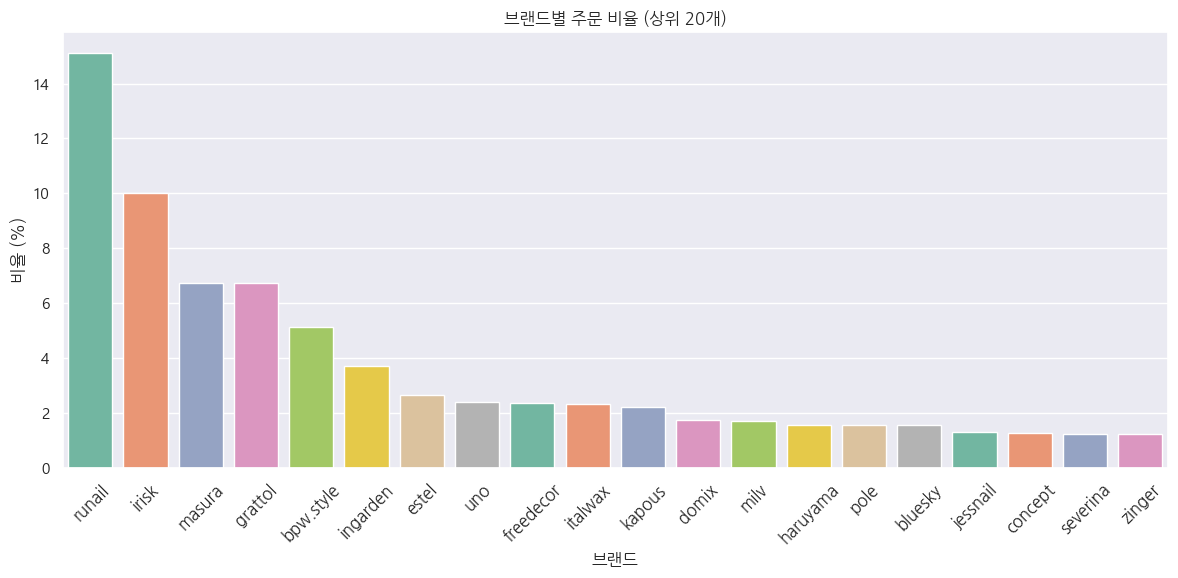

In [11]:
plt.figure(figsize=(12, 6))

# x축: 브랜드명, y축: 주문비율 (result_df 기준)
sns.barplot(
    x=result_df.index,
    y=result_df['주문비율(%)'],
    palette='Set2'
)

plt.title('브랜드별 주문 비율 (상위 20개)', fontproperties=font_prop)
plt.xlabel('브랜드', fontproperties=font_prop)
plt.ylabel('비율 (%)', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()

In [12]:
# 분위수 기준 경계값 계산
q1 = result_df['평균주문가격'].quantile(1/3)  # 하위 33%
q2 = result_df['평균주문가격'].quantile(2/3)  # 하위 66%

def price_segment(price):
    if price <= q1:
        return '저가'
    elif price <= q2:
        return '중가'
    else:
        return '고가'

# 새로운 컬럼 추가
result_df['가격대'] = result_df['평균주문가격'].apply(price_segment)

print(result_df)

           주문비율(%)  평균주문가격 가격대
brand                         
runail       15.11    3.08  저가
irisk        10.01    3.03  저가
masura        6.74    2.81  저가
grattol       6.72    5.38  고가
bpw.style     5.15    1.18  저가
ingarden      3.72    4.55  고가
estel         2.64    6.27  고가
uno           2.39   10.85  고가
freedecor     2.37    1.30  저가
italwax       2.32    6.08  고가
kapous        2.22    3.85  중가
domix         1.76    3.85  중가
milv          1.72    1.77  저가
haruyama      1.57    3.91  중가
pole          1.57    3.58  중가
bluesky       1.56    4.19  중가
jessnail      1.31   13.95  고가
concept       1.29    5.63  고가
severina      1.24    2.86  저가
zinger        1.22    4.21  중가


In [14]:
# 평균주문가격 기준 오름차순 정렬
sorted_df = result_df.sort_values(by='평균주문가격', ascending=False)

print(sorted_df)

           주문비율(%)  평균주문가격 가격대
brand                         
jessnail      1.31   13.95  고가
uno           2.39   10.85  고가
estel         2.64    6.27  고가
italwax       2.32    6.08  고가
concept       1.29    5.63  고가
grattol       6.72    5.38  고가
ingarden      3.72    4.55  고가
zinger        1.22    4.21  중가
bluesky       1.56    4.19  중가
haruyama      1.57    3.91  중가
kapous        2.22    3.85  중가
domix         1.76    3.85  중가
pole          1.57    3.58  중가
runail       15.11    3.08  저가
irisk        10.01    3.03  저가
severina      1.24    2.86  저가
masura        6.74    2.81  저가
milv          1.72    1.77  저가
freedecor     2.37    1.30  저가
bpw.style     5.15    1.18  저가


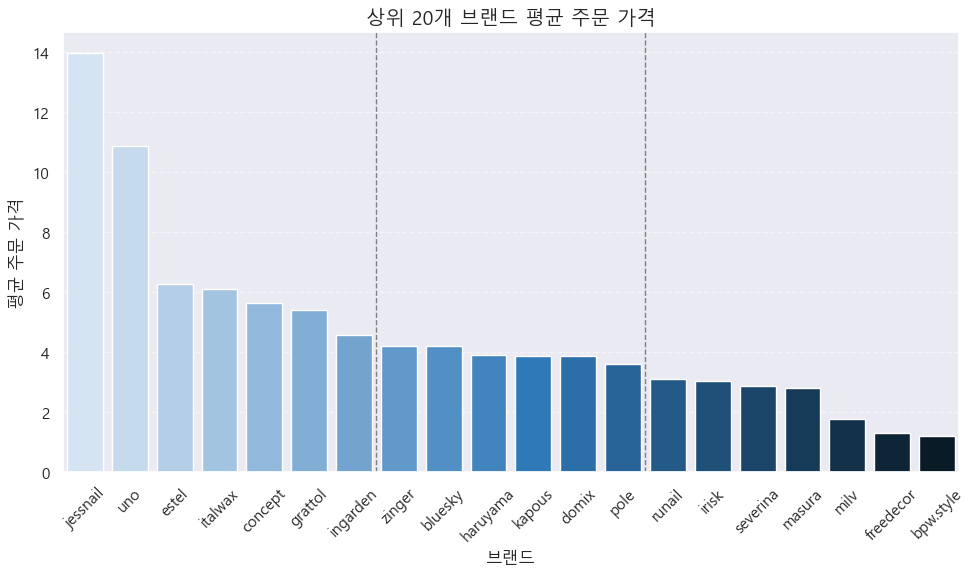

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주신 20색 팔레트
blue_palette = [
    '#d0e4f7',
    '#bedaf3',
    '#abcfef',
    '#99c5eb',
    '#86bae7',
    '#74afe3',
    '#62a5df',
    '#509adB',
    '#3e90d7',
    '#2c85d3',
    '#197bcf',
    '#1770bd',
    '#1566ab',
    '#125b99',
    '#105187',
    '#0e4675',
    '#0b3c63',
    '#093151',
    '#07263f',
    '#051c2d'
]

# 인덱스(브랜드명) 컬럼으로 변환
plot_df = sorted_df.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    x='brand',
    y='평균주문가격',
    palette=blue_palette  # 지정 팔레트 사용
)

# 구분선: 고가 7개 / 중가 6개 / 저가 7개
plt.axvline(x=7 - 0.5, color='gray', linestyle='--', linewidth=1)   # 고가-중가 경계
plt.axvline(x=7 + 6 - 0.5, color='gray', linestyle='--', linewidth=1)  # 중가-저가 경계

plt.title('상위 20개 브랜드 평균 주문 가격', fontsize=14)
plt.xlabel('브랜드', fontsize=12)
plt.ylabel('평균 주문 가격', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

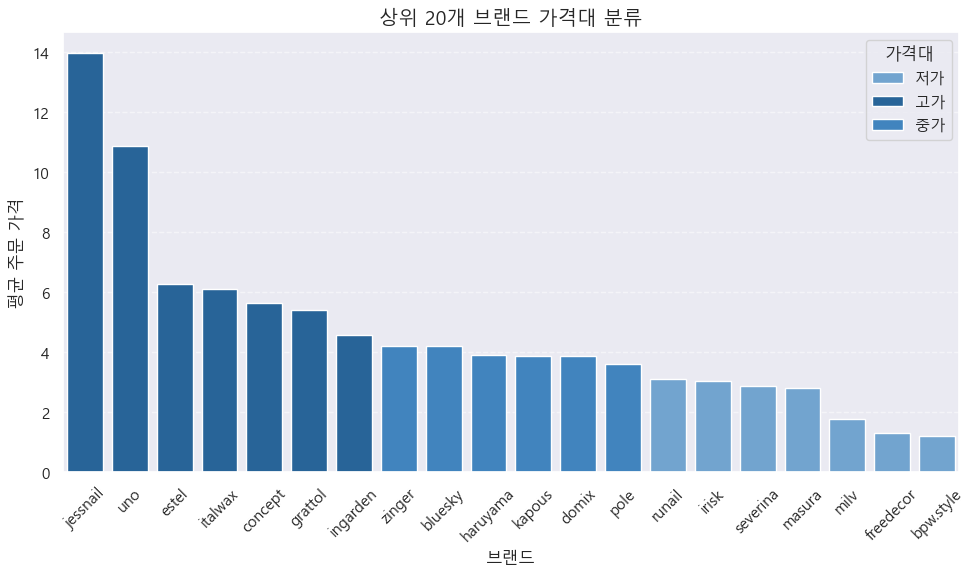

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 팔레트 색상 (7, 10, 13번째)
custom_palette = {
    '저가': '#62a5df',  # 7번째
    '중가': '#2c85d3',  # 10번째
    '고가': '#1566ab'   # 13번째
}

# 가격 순서대로 정렬
sorted_brands = result_df.sort_values(by='평균주문가격', ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=result_df.reset_index(),
    x='brand',
    y='평균주문가격',
    hue='가격대',
    order=sorted_brands,
    palette=custom_palette,
    dodge=False
)

plt.title('상위 20개 브랜드 가격대 분류', fontsize=14)
plt.xlabel('브랜드', fontsize=12)
plt.ylabel('평균 주문 가격', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()